In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Temperature Analysis: Bonus Part 2

In [96]:
def calc_temps(start_date, end_date):
    return session.query(
        func.min(Measurement.tobs),
        func.avg(Measurement.tobs),
        func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2012-02-12', '2012-02-22'))

[(62.0, 70.43529411764706, 77.0)]


In [85]:
temps = calc_temps('2017-05-15', '2017-05-30')
temps

[(68.0, 74.94505494505495, 87.0)]

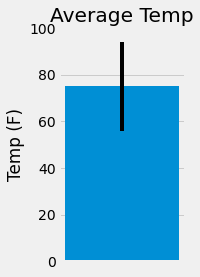

In [110]:
t_avg = temps[0][1]
t_min = temps[0][0]
t_max = temps[0][2]
plt.figure(figsize=[2, 4])
plt.bar(1, t_avg, yerr=[t_max - t_min])
plt.title('Average Temp')
plt.ylabel('Temp (F)')
ax = plt.gca()
ax.get_xaxis().set_visible(False)
plt.ylim(0, 100)
plt.show()

## Close Session

In [17]:
session.close()